In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
crop = pd.read_csv("/content/Crop_recommendation (1).csv")
crop


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
print("shape of the dataset:",crop.shape)

shape of the dataset: (2200, 8)


In [ ]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
#To check how many null values are there in given dataset we use isnull function 
crop.isnull().sum() 

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
@interact
def summary(crops = list(crop['label'].value_counts().index)):
    x = crop[crop['label']== crops]
    z = crop.drop(['label'],axis=1)
    y = []
    y.append(z)
    for i in z:
        print('Minimum', i, 'required', x[i].min())
        print('Average', i, 'required', x[i].mean())
        print('Maximum', i, 'required', x[i].max())
        print('--------------------------------------------------')

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [ ]:
print('Summer Crops:', crop[(crop['temperature']>30) & (crop['humidity']>50)]['label'].unique())
print('Winter Crops:', crop[(crop['temperature']<20) & (crop['humidity']>30)]['label'].unique())
print('Rainy Crops:', crop[(crop['rainfall']>200) & (crop['humidity']>30)]['label'].unique())

Summer Crops: ['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
Winter Crops: ['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
Rainy Crops: ['rice' 'papaya' 'coconut']


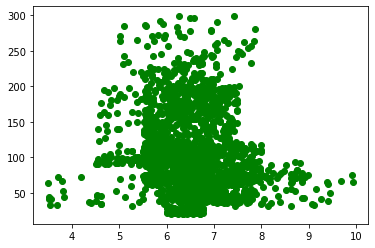

In [ ]:
plt.scatter(x = crop['ph'], y = crop['rainfall'], color = 'green')


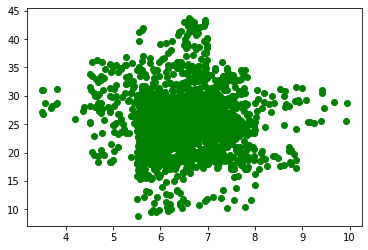

In [ ]:
plt.scatter(x = crop['ph'], y = crop['temperature'], color = 'green')


In [ ]:
print("summer crops")
print (crop[(crop['temperature']>30) & (crop['humidity']>50)]['label'].unique())
print("----------")
print(crop[(crop['temperature']<20) & (crop['humidity']>30)]['label'].unique())
print("------------")
print(crop[(crop['rainfall']>200) & (crop['humidity']>30)]['label'].unique())
print("------------")


summer crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
----------
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
------------
['rice' 'papaya' 'coconut']
------------


In [ ]:
from sklearn.cluster import KMeans
x = crop.drop(['label'], axis = 1)
x = x.values
print(x.shape)


(2200, 7)


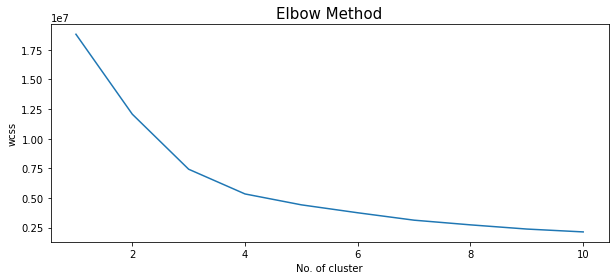

In [ ]:
z = crop.drop(['label'],axis=1)
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10,4)
wcss = []
for i in range (1,11):
    km = KMeans(n_clusters =i, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(z)
    wcss.append(km.inertia_)
    
#plot the results
plt.plot(range(1,11), wcss)
plt.title('Elbow Method', fontsize= 15)
plt.xlabel('No. of cluster')
plt.ylabel('wcss')
plt.show()


In [ ]:
km = KMeans(n_clusters =4, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
y_means= km.fit_predict(z)

a = crop['label']
y_means = pd.DataFrame(y_means)
w = pd.concat([y_means, a], axis=1)
w =w.rename(columns= {0:'cluster'})
for i in range(0,4): #for 4 clusters 0,1,2,3
    print('Crops is cluster', i, w[w['cluster']==i]['label'].unique())
    print('---------------------------------------------------------------------')

Crops is cluster 0 ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
---------------------------------------------------------------------
Crops is cluster 1 ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
---------------------------------------------------------------------
Crops is cluster 2 ['grapes' 'apple']
---------------------------------------------------------------------
Crops is cluster 3 ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
---------------------------------------------------------------------


In [ ]:
y = crop['label']
y.head()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(x_train,y_train)
y_pred1 = clf_knn.predict(x_test)
print("Accuracy Score of KNN:",accuracy_score(y_test,y_pred1))

from sklearn.svm import SVC
clf_svc = SVC()
clf_svc.fit(x_train,y_train)
y_pred2 = clf_svc.predict(x_test)
print("Accuracy Score of SVC:",accuracy_score(y_test,y_pred2))

from sklearn.tree import DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier(criterion='entropy',random_state=7)
clf_dtc.fit(x_train,y_train)
y_pred3 = clf_dtc.predict(x_test)
print("Accuracy Score of decision tree:",accuracy_score(y_test,y_pred3))

from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier(random_state=1)
clf_rfc.fit(x_train, y_train)
y_pred4 = clf_rfc.predict(x_test)
print("Accuracy Score of Random Forest:",accuracy_score(y_test,y_pred4))

Accuracy Score of KNN: 0.9772727272727273
Accuracy Score of SVC: 0.9772727272727273
Accuracy Score of decision tree: 0.9931818181818182
Accuracy Score of Random Forest: 0.9977272727272727


In [ ]:
y_train_pred = clf_rfc.predict(x_train)
print("Accuracy Score of Random Forest:",accuracy_score(y_train,y_train_pred))

Accuracy Score of Random Forest: 1.0


In [ ]:
output = pd.DataFrame({'Real_class': y_test, 'Predicted_class': y_pred4})
output.head()

,Real_class,Predicted_class
1320,watermelon,watermelon
1367,watermelon,watermelon
1291,grapes,grapes
264,chickpea,chickpea
728,blackgram,blackgram


In [ ]:
input = np.array([[90,42,43,20.879744,82.002744,6.502985,202.935536]])
clf_rfc.predict(input)

array(['rice'], dtype=object)